#  Income prediction

The objective of this project is create a model that can predict income based on multiple variables:
* Employment
* Industry
* BDM
* Work_type
* Qualifications
* Age
* Relationship
* Gender
* Home status

The ABS states that on average, Australians earn $80,000 p.a.
The aim is to identify and predict whether someone falls above average

### About the data set
We will use survey data collected from an Australian online panel.


### Model
Decision regression tree

# Library import

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#import matplotlib.pyplot as plt
#from sklearn.model_selection import cross_val_score

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.ExcelFile('~/Documents/GMTPalma/Project data.xlsx')
df.sheet_names

['Data (2)', 'Data', 'Description', 'Project data']

In [3]:
#Data dictionary
definition = df.parse('Description')
definition.head(40)

,Label,Code,Definition
0,Gender,1,Male
1,Gender,2,Female
2,State,1,NSW
3,State,2,VIC
4,State,3,QLD
5,State,4,WA
6,State,5,SA
7,State,6,ACT
8,State,7,TAS
9,State,8,NT


In [4]:
#data file
file = df.parse('Data')
file.head(10)

,Gender,State,Age,Employment,Partnership,Children,No_of_children,Home_status,Qualified,Income,Salary,Work_type,BDM,Industry
0,1,2,22,1,0,0,0,NaN,1,102499.5,Above 80,2,1,16
1,0,0,0,0,0,0,0,NaN,1,0.0,NaN,0,0,0
2,2,1,57,1,1,1,0,Mortgage,1,0.0,NaN,1,1,22
3,1,1,42,1,0,0,0,NaN,1,352499.5,Above 80,1,1,23
4,1,1,42,1,0,0,0,Renting,0,0.0,NaN,2,1,24
5,0,0,0,0,0,0,0,NaN,1,0.0,NaN,0,0,0
6,0,0,0,0,0,0,0,NaN,1,0.0,NaN,0,0,0
7,2,1,37,0,0,0,0,NaN,0,0.0,NaN,0,0,0
8,1,1,67,0,0,0,0,NaN,0,0.0,NaN,0,0,0
9,1,2,57,1,0,0,0,Mortgage,0,92499.5,Above 80,2,1,19


In [5]:
#types of columns
file.dtypes

Gender              int64
State               int64
Age                 int64
Employment          int64
Partnership         int64
Children            int64
No_of_children      int64
Home_status        object
Qualified           int64
Income            float64
Salary             object
Work_type           int64
BDM                 int64
Industry            int64
dtype: object

In [6]:
# Check the unique values of categorical (string / objects) variables:
print(file['Employment'].unique())
print(file['Industry'].unique())
print(file['BDM'].unique())
print(file['Work_type'].unique())
print(file['Age'].unique())
print(file['Qualified'].unique())
print(file['Salary'].unique())
print(file['Home_status'].unique())

[1 0]
[16  0 22 23 24 19 11  5 28  1 32  6  4 31 10 26 15  8 17 21  7 25  2 12 30
 14 33 20 29  9  3 18 27 13]
[1 0]
[2 0 1 5 4 3]
[22  0 57 42 37 67 47 62 32 52 21 16]
[1 0]
['Above 80' nan]
[nan 'Mortgage' 'Renting' 'Home own' 'Other']


In [7]:
# Plot a Correlation Matrix original file:
corr = file.corr()
corr = (corr)
corr

,Gender,State,Age,Employment,Partnership,Children,No_of_children,Qualified,Income,Work_type,BDM,Industry
Gender,1.000000,0.190763,0.350472,0.049647,0.050235,0.080671,0.057431,0.053758,-0.008289,0.057877,-0.020703,0.014661
State,0.190763,1.000000,0.259453,0.040865,0.016830,0.031578,-0.018954,-0.006700,0.045941,0.042728,-0.006973,0.029512
Age,0.350472,0.259453,1.000000,0.024473,0.130889,0.226406,-0.012703,0.117634,0.130094,-0.016043,0.005594,0.025641
Employment,0.049647,0.040865,0.024473,1.000000,0.062781,0.009739,0.029789,0.194539,0.418967,0.781972,0.502124,0.738297
Partnership,0.050235,0.016830,0.130889,0.062781,1.000000,0.612350,0.411182,0.245580,0.077290,0.042796,0.030308,0.048454
Children,0.080671,0.031578,0.226406,0.009739,0.612350,1.000000,0.661449,0.263019,0.067124,-0.002945,0.003626,0.007792
No_of_children,0.057431,-0.018954,-0.012703,0.029789,0.411182,0.661449,1.000000,0.183727,0.039495,0.013016,0.020435,0.025760
Qualified,0.053758,-0.006700,0.117634,0.194539,0.245580,0.263019,0.183727,1.000000,0.191781,0.098336,0.111698,0.144195
Income,-0.008289,0.045941,0.130094,0.418967,0.077290,0.067124,0.039495,0.191781,1.000000,0.238678,0.289510,0.342959
Work_type,0.057877,0.042728,-0.016043,0.781972,0.042796,-0.002945,0.013016,0.098336,0.238678,1.000000,0.307498,0.601915


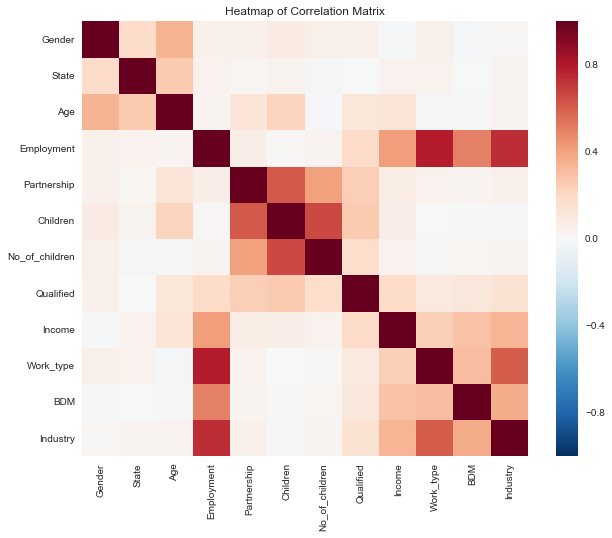

In [8]:
#heatmap original file
plt.figure(figsize = (10,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [83]:
#Extract 'Salary' column, because that is the target outcome original file
corr_salary = pd.DataFrame(corr['Income'].drop('Income'))
corr_salary.sort_values(by='Income', ascending = False )

,Income
Employment,0.418967
Industry,0.342959
BDM,0.289510
Work_type,0.238678
Qualified,0.191781
Age,0.130094
Partnership,0.077290
Children,0.067124
State,0.045941
No_of_children,0.039495


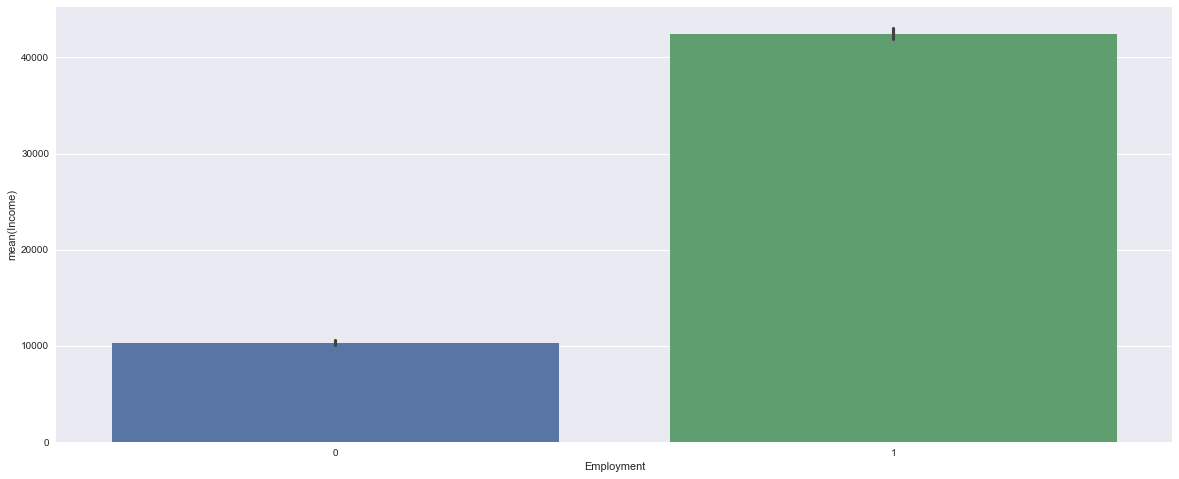

In [10]:
# Income with employment
plt.figure(figsize = (20,8))
sns.barplot(x='Employment', y = 'Income', data = file)

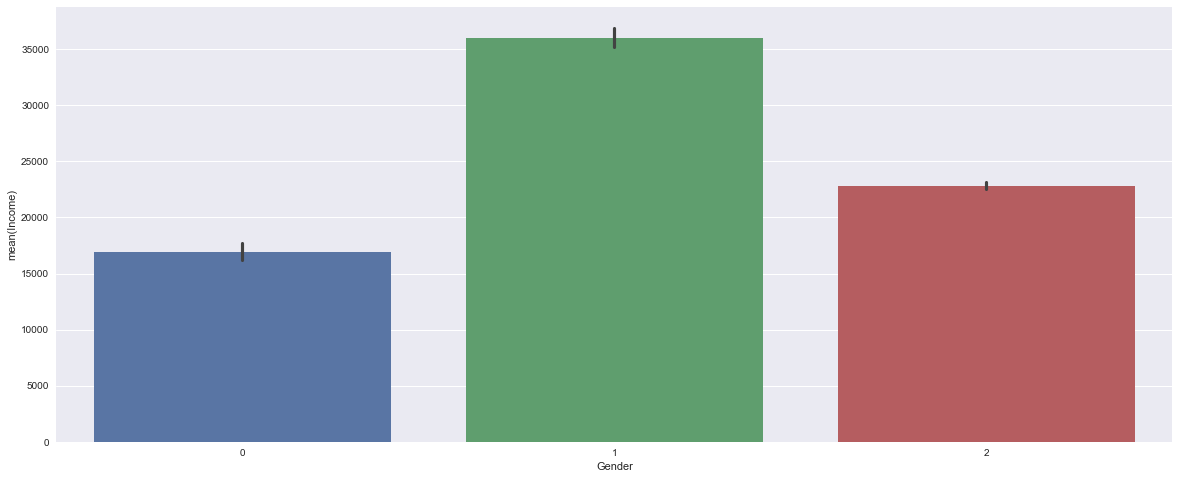

In [11]:
# Income with gender
plt.figure(figsize = (20,8))
sns.barplot(x='Gender', y = 'Income', data = file)

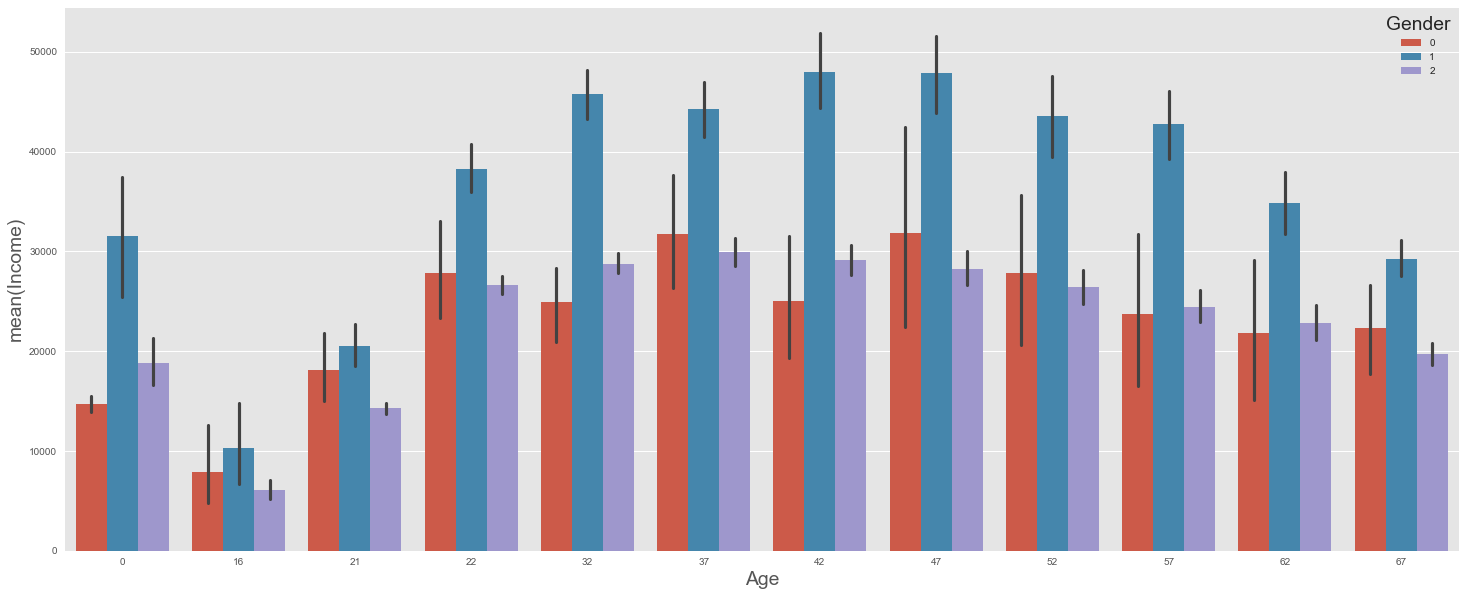

In [78]:
# age, gender & salary
plt.figure(figsize = (25,10))
sns.barplot(x='Age', y = 'Income', hue = 'Gender', data = file)

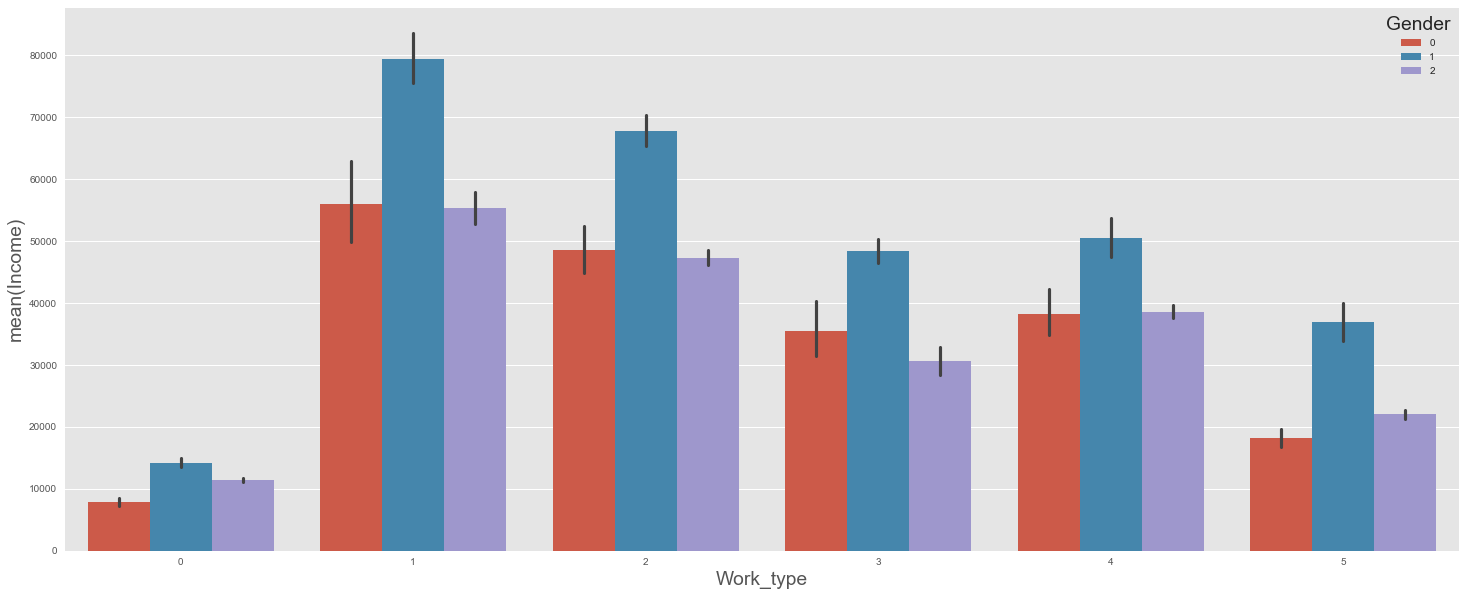

In [79]:
# work type, gender & salary
plt.figure(figsize = (25,10))
sns.barplot(x='Work_type', y = 'Income', hue = 'Gender', data = file)

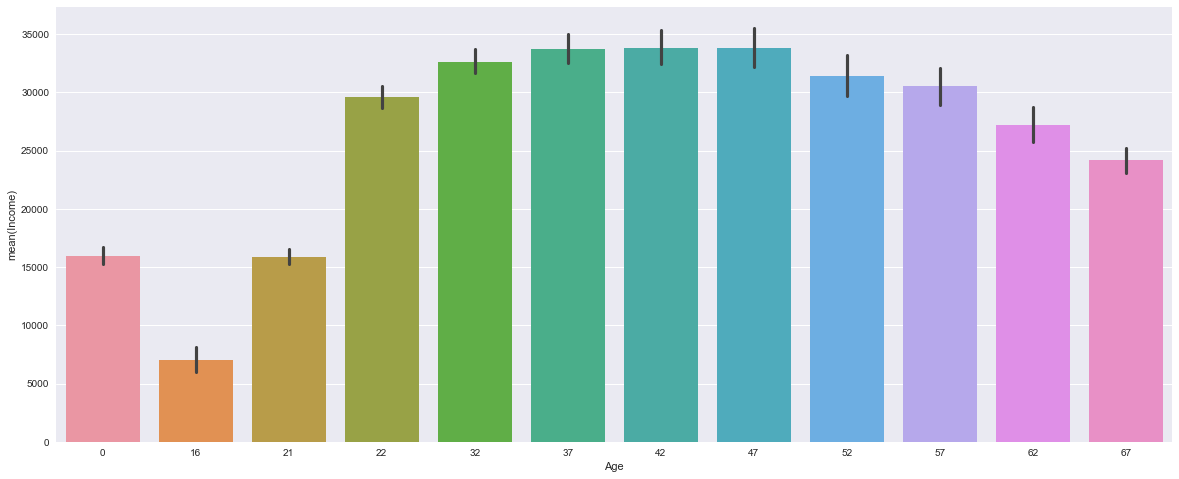

In [12]:
# Income with age
plt.figure(figsize = (20,8))
sns.barplot(x='Age', y = 'Income', data = file)

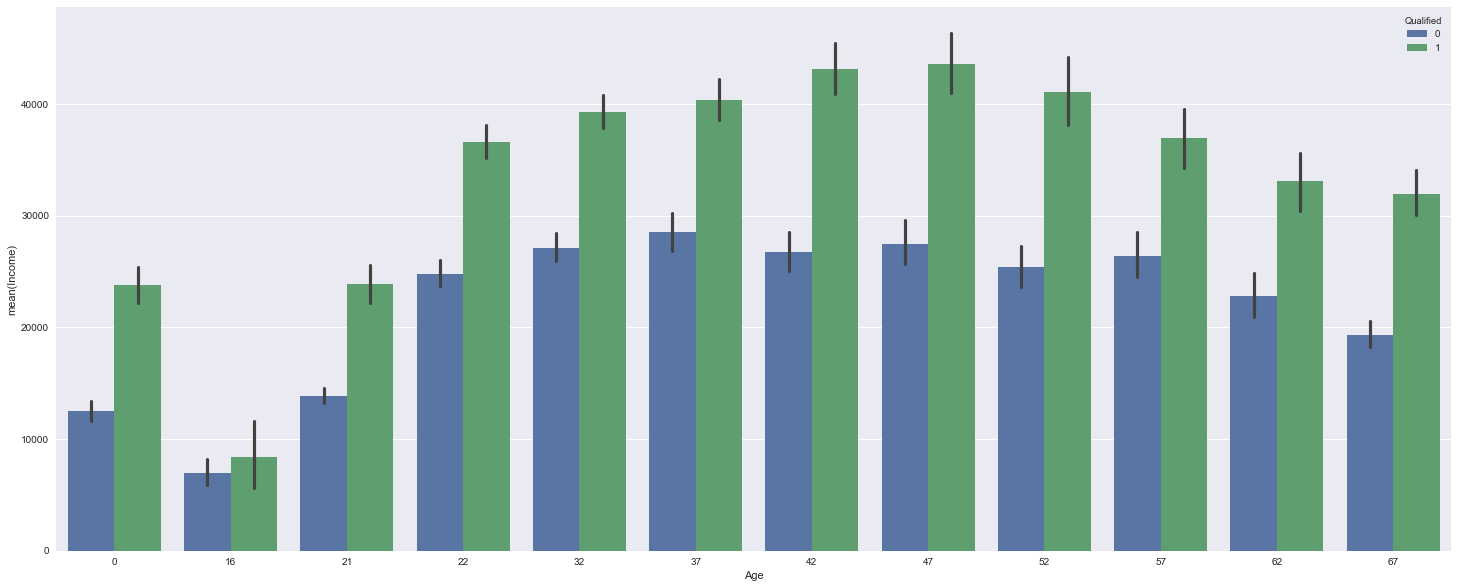

In [13]:
# salary with with age and qualifications
plt.figure(figsize = (25,10))
sns.barplot(x='Age', y = 'Income', hue = 'Qualified', data = file)

In [ ]:
# should you make a comparison? -- between different locations? business decision makers?
data=file
plt.figure(figsize = (12,12))

plt.subplot(1,2,1)
plt.plot(data.satisfaction_level[data.left == 1],data.last_evaluation[data.left == 1],'o', alpha = 0.1)

#plt.ylabel('Last Evaluation')
#plt.title('Employees who left')
#plt.xlabel('Satisfaction level')

#plt.subplot(1,2,2)
#plt.title('Employees who stayed')
#plt.plot(data.satisfaction_level[data.left == 0],data.last_evaluation[data.left == 0],'o', alpha = 0.1)
#plt.xlim([0.4,1])
#plt.ylabel('Last Evaluation')
#plt.xlabel('Satisfaction level')

### Method

In [14]:
#Extract 'Salary' column, because that is the target outcome original file
corr_salary = pd.DataFrame(corr['Income'].drop('Income'))
corr_salary.sort_values(by='Income', ascending = False)

,Income
Employment,0.418967
Industry,0.342959
BDM,0.289510
Work_type,0.238678
Qualified,0.191781
Age,0.130094
Partnership,0.077290
Children,0.067124
State,0.045941
No_of_children,0.039495


In [59]:
# Variables that are of relevance
    
relevant_variables = ['Employment', 'Industry', 'BDM', 'Work_type','Age','Qualified',
                      'Partnership','Salary','Home_status','Gender']

In [60]:
# Categorical data

categorical_variables = ['Salary','Home_status']

In [61]:
# define your data set

df = file.loc[:, relevant_variables]
df.head(10)

,Employment,Industry,BDM,Work_type,Age,Qualified,Partnership,Salary,Home_status,Gender
0,1,16,1,2,22,1,0,Above 80,NaN,1
1,0,0,0,0,0,1,0,NaN,NaN,0
2,1,22,1,1,57,1,1,NaN,Mortgage,2
3,1,23,1,1,42,1,0,Above 80,NaN,1
4,1,24,1,2,42,0,0,NaN,Renting,1
5,0,0,0,0,0,1,0,NaN,NaN,0
6,0,0,0,0,0,1,0,NaN,NaN,0
7,0,0,0,0,37,0,0,NaN,NaN,2
8,0,0,0,0,67,0,0,NaN,NaN,1
9,1,19,1,2,57,0,0,Above 80,Mortgage,1


In [64]:
# Change categorical variables to numeric

features_categorical = ['Salary','Home_status']

for c in features_categorical:
    df[c] = pd.Categorical(df[c]).codes

df.head(10)

,Employment,Industry,BDM,Work_type,Age,Qualified,Partnership,Salary,Home_status,Gender
0,1,16,1,2,22,1,0,1,0,1
1,0,0,0,0,0,1,0,0,0,0
2,1,22,1,1,57,1,1,0,2,2
3,1,23,1,1,42,1,0,1,0,1
4,1,24,1,2,42,0,0,0,4,1
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,37,0,0,0,0,2
8,0,0,0,0,67,0,0,0,0,1
9,1,19,1,2,57,0,0,1,2,1


In [65]:
# define features and target or outcome
features = ['Home_status', 'Employment','Qualified', 'Work_type', 'BDM', 'Industry',
            'Age','Partnership', 'Gender']
target = 'Salary'

In [66]:
# Classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
classifier = DecisionTreeClassifier(random_state=1)

# Split and train data

In [67]:
import math

In [68]:
# train & split data
# Set a random seed so the shuffle is the same every time
np.random.seed(1)

# Shuffle the rows  - This permutes the index randomly using numpy.random.permutation. Then, it reindexes the dataframe with the result. The net effect is to put the rows into random order
Salary = df.reindex(np.random.permutation(df.index))

# 80% to train and 20% to test
train_max_row = math.floor(Salary.shape[0] * .8)

train = Salary.iloc[:train_max_row, :]
test = Salary.iloc[train_max_row:, :]

# Fit model

In [69]:
classifier.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

# Make predictions

In [86]:
predictions = classifier.predict(test[features])
predictions[:2]

array([0, 0], dtype=int8)

In [87]:
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

# Accuracy test

In [71]:
# Calculating the area under the curve

from sklearn.metrics import roc_auc_score

In [90]:
test_auc = roc_auc_score(test[target], predictions)

print(test_auc)

0.608960029048


# over-fitting test

In [91]:
# test of overfitting using area under the curve
train_predictions = classifier.predict(train[features])

train_auc = roc_auc_score(train[target], train_predictions)

print(train_auc)

0.792767534575


# Tree depth restrictions

In [115]:
def get_aucs(max_depth):
    # Decision trees model with max_depth 
    clf = DecisionTreeClassifier(random_state=1, max_depth=max_depth)

    clf.fit(train[features], train[target])

    # Test AUC
    predictions = clf.predict(test[features])
    test_auc = roc_auc_score(test[target], predictions)

    # Train AUC
    predictions_train = clf.predict(train[features])
    train_auc = roc_auc_score(train[target], predictions_train)
    
    return test_auc, train_auc

depth_values = np.arange(2, 40)
auc_values = np.zeros((len(depth_values), 3))
for i, val in enumerate(depth_values):
    test_auc, train_auc = get_aucs(val)
    auc_values[i, 0]  = val
    auc_values[i, 1]  = test_auc
    auc_values[i, 2]  = train_auc

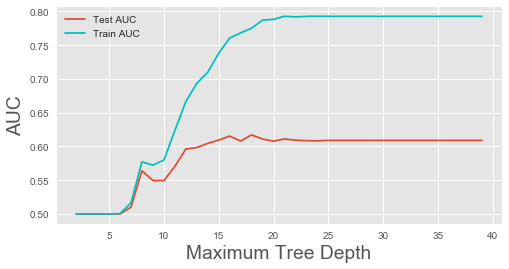

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(8,4))
plt.plot(auc_values[:,0], auc_values[:,1], label='Test AUC') 
plt.plot(auc_values[:,0], auc_values[:,2], color='c', label='Train AUC')
plt.legend()
plt.xlabel('Maximum Tree Depth')
plt.ylabel('AUC')

plt.show()

In [110]:
clf = DecisionTreeClassifier(random_state=1, max_depth=18)
clf.fit(train[features], train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [111]:
pred = clf.predict(test[features])
test_auc = roc_auc_score(test[target], pred)
print(test_auc)

0.617106179584


In [112]:
train_pred = clf.predict(train[features])

train_auc = roc_auc_score(train[target], train_pred)

print(train_auc)

0.775251922562


# Visualisation

In [ ]:
! pip install graphviz
! pip install pydot

In [ ]:
from io import StringIO
from sklearn.tree import export_graphviz

In [ ]:
dt = tree.DecisionTreeClassifier()

In [ ]:
out = StringIO()
tree.export_graphviz(dt, out_file = out)
# OUTPUT DOT LANGUAGE SCRIPTS
print(out.getvalue())

In [ ]:
# http://webgraphviz.com/

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

# Create a feature vector
features = hr_data_with_dummies.columns.tolist()

from sklearn.tree import export_graphviz
tree.export_graphviz(dt, out_file='tree_hr_analysis_smaller_tree.dot', feature_names=features)